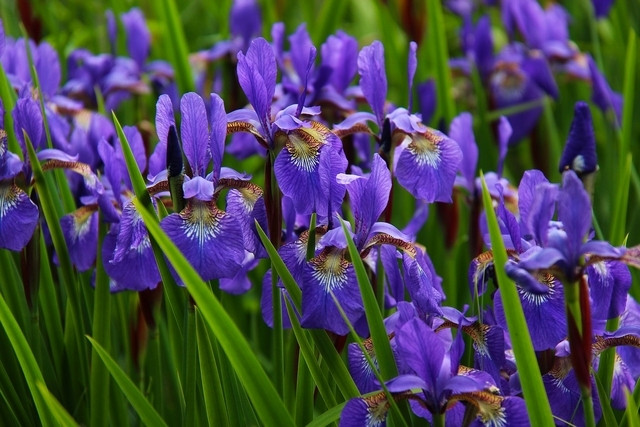

# Designing a Machine Learning Model

# Introduction

In this guide, we are going to implement a ***Logistic regression model*** from scratch and compare the accuracy with its sci-kit learn library, describe and visualize the dataset. In Machine Learning (ML) and data mining algorithms, logistic regression is the part of the Classification technique. A lot many problems in Data Science are to be solved by applying Classification techniques. 

Logistic Regression is one of the most simple and commonly used models to implement a baseline for any **binary classification** problem. It can predict weather the mail is a spam or not and predict Diabetes in an individual, but probably it's not a good idea to predict someone's house price using. Another category is **multinomial classification**, where multiple classes are present in the target variable.

We will explore a  known multi-class problem - ***"Iris Dataset from UCI Machine Learning Repository"***.It is used to predicts the species of the flower based on their given dimensions.

You can download the dataset from [here](https://www.kaggle.com/uciml/iris). Please note that you will need to have a [Kaggel account](https://www.kaggle.com/account/login?phase=startRegisterTab&returnUrl=%2F) to download the dataset.


## Pre-requisites 

- You are expected to have **Python 3.6** and above versions installed in your system. [Click here](https://www.python.org/downloads/) to install it.

- Also, make sure you have installed **Anaconda3**, Python 3, 64 bits. [Click here](https://www.anaconda.com/distribution/) to install it.

- It is adviceable to run your code on **[Juputer Notebook](https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/what_is_jupyter.html)** it is an excellent tool for learning, experimenting and documenting. One can also save work in the form of .iPynb,.py,.md, etc

- Juputer Notebook can be launched by clicking Jupyter notebook icon installed by Anaconda or by writing `jupyter notebook` in command prompt (*cmd for windows*). 

If stuck while installation of Jupter Notebook refer to [this guide](https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/install.html)

## By the end of this guide...

1. You will get a clearer picture of the volume and variety of the dataset by visualizing it. Visualization is like telling the story out of text data and making analysis more efficient.

2. By building an ML algorithm from the scratch, you will be able to convert the mathematical steps into running code. And secondly, you will build an understanding of the mechanics behind the algorithm. These will level-up your skills and force you to think out-of-the-box.

3. You will successfully unlock the level of designing your Logistic Regression machine learning model which you can showcase on different data science platforms.

**So let us begin our journey!**

# Introduction to dataset 

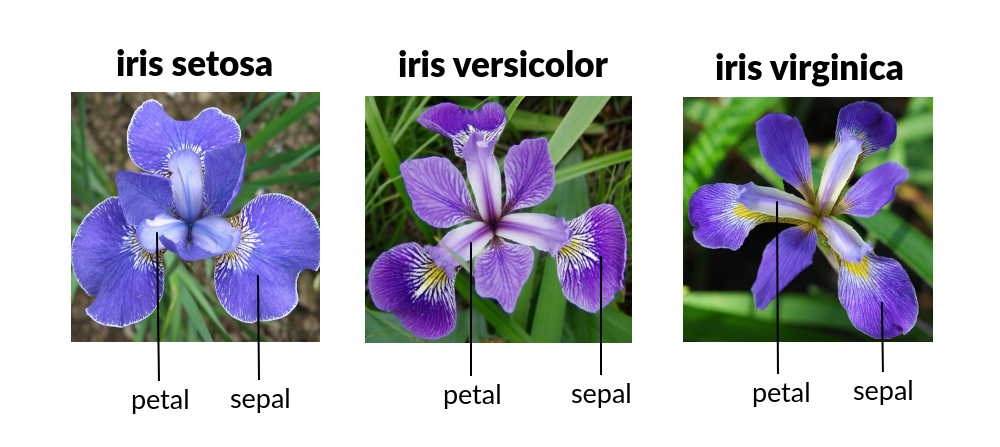

- There are three Iris species: Iris setosa, Iris versicolor, Iris virginica
- There are 50 observations of each species 
- There are 150 observations with 4 features each (sepal length, sepal width, petal length, petal width).
- There are no null values, so we don't have to worry about that.

Based on the combination of the mentioned four features, Fisher developed a linear discriminant model to distinguish the species from each other.

Want to know more about the data? [click here](https://en.wikipedia.org/wiki/Iris_flower_data_set)

**Before we start, we need to clear some ML notations.**

**Attributes**- Also known as Features. An attribute is the specification of an instance that may be used to determine its classification. In the following dataset, the attributes are the petal and sepal length and width.

**Target variable** - In the context of ML, it is the variable that is or should be the output. Here the target variables are the 3 flower species.

# Importing the required packages 

All the packaging tools are designed to be installed using the command prompt. Open Python scripts directory in command prompt to install the packages. The following command is used to install the latest version of the required package and dependencies. `python -m pip install Packagename`. Replace `Packagename` with the desired package.

Packages to install for this guide are - 
- [Numpy](https://numpy.org/)
- [matplotlib](https://matplotlib.org/users/index.html)
- [Seabon](https://seaborn.pydata.org/introduction.html)
- [Scipy](https://www.scipy.org/getting-started.html)
- [pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html)
- [Scikit-Learn](https://scikit-learn.org/stable/user_guide.html)


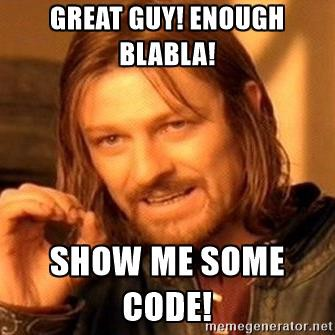

In [1]:
# import libraries
from subprocess import check_output
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings 
warnings.filterwarnings('ignore') #ignore warnings
from math import ceil 

#Visualization
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import confusion_matrix #Confusion matrix
from sklearn.metrics import accuracy_score # Accuracy score

# Spliting training and testing
from sklearn.model_selection import train_test_split

#Advanced optimization
from scipy import optimize as op



# Loading and Previewing the Data


In [2]:
#Laoding the data
data_iris = pd.read_csv('Iris.csv') # If your input csv file is placed with working directory
# data_iris=pd.read_csv('../input/Iris.csv') # Enter the path of the directory where input csv is stored

In [3]:
data_iris.head()# first 5 entries of dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data_iris.tail()# last 5 entries of dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
data_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


A Statistical details (percentile, mean standard diviation)of whole dataset - 150 observation 



In [6]:
data_iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
data_iris['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [8]:
data_iris.isnull().values.any()

False

Great! there is no missing data and all the 50 observation. Now Repeat describe funtion for the species of ‘Iris-setosa’, ‘Iris-versicolor’ and ‘Iris-versicolor’.

In [9]:
print('Iris-setosa')
setosa = data_iris['Species'] == 'Iris-setosa'
print(data_iris[setosa].describe())
print('\nIris-versicolor')
versicolor = data_iris['Species'] == 'Iris-versicolor'
print(data_iris[versicolor].describe())
print('\nIris-virginica')
virginica = data_iris['Species'] == 'Iris-virginica'
print(data_iris[virginica].describe())

Iris-setosa
             Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  50.00000       50.00000     50.000000      50.000000      50.00000
mean   25.50000        5.00600      3.418000       1.464000       0.24400
std    14.57738        0.35249      0.381024       0.173511       0.10721
min     1.00000        4.30000      2.300000       1.000000       0.10000
25%    13.25000        4.80000      3.125000       1.400000       0.20000
50%    25.50000        5.00000      3.400000       1.500000       0.20000
75%    37.75000        5.20000      3.675000       1.575000       0.30000
max    50.00000        5.80000      4.400000       1.900000       0.60000

Iris-versicolor
              Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count   50.00000      50.000000     50.000000      50.000000     50.000000
mean    75.50000       5.936000      2.770000       4.260000      1.326000
std     14.57738       0.516171      0.313798       0.469911      0.197753
min  

# Visualizations


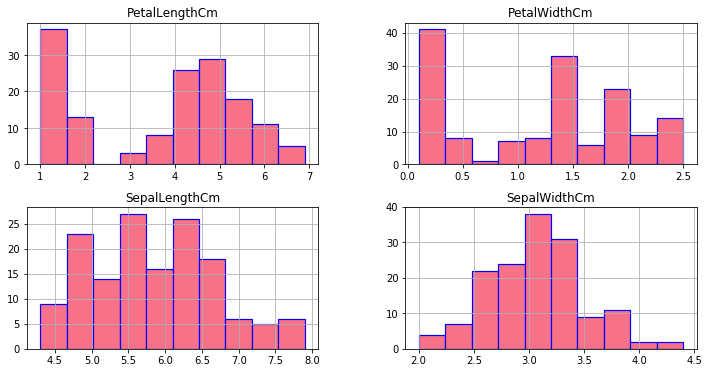

In [26]:
#The Histogram representation of the univariate plots for each measurement

np = data_iris.drop('Id', axis=1) #dropping the Id 
np.hist(edgecolor='blue', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

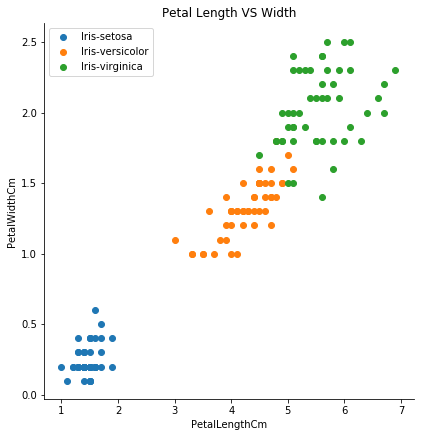

In [11]:
#ploting scatter plot with respect to petal length
petalPlt = sb.FacetGrid(data_iris, hue="Species", size=6).map(plt.scatter, "PetalLengthCm", "PetalWidthCm")
plt.legend(loc='upper left');
plt.title("Petal Length VS Width");

Text(0.5,1,'Sepal Length VS Width')

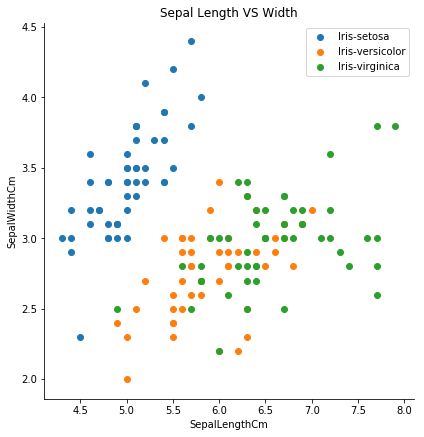

In [12]:
#Ploting scatter plot with respect to sepal length
sepalPlt = sb.FacetGrid(data_iris, hue="Species", size=6).map(plt.scatter, "SepalLengthCm", "SepalWidthCm")
plt.legend(loc='upper right');
plt.title("Sepal Length VS Width")

Here we can see that Patal Features are giving better cluster division. Let us check the bivariate relation between each pair of the feature.

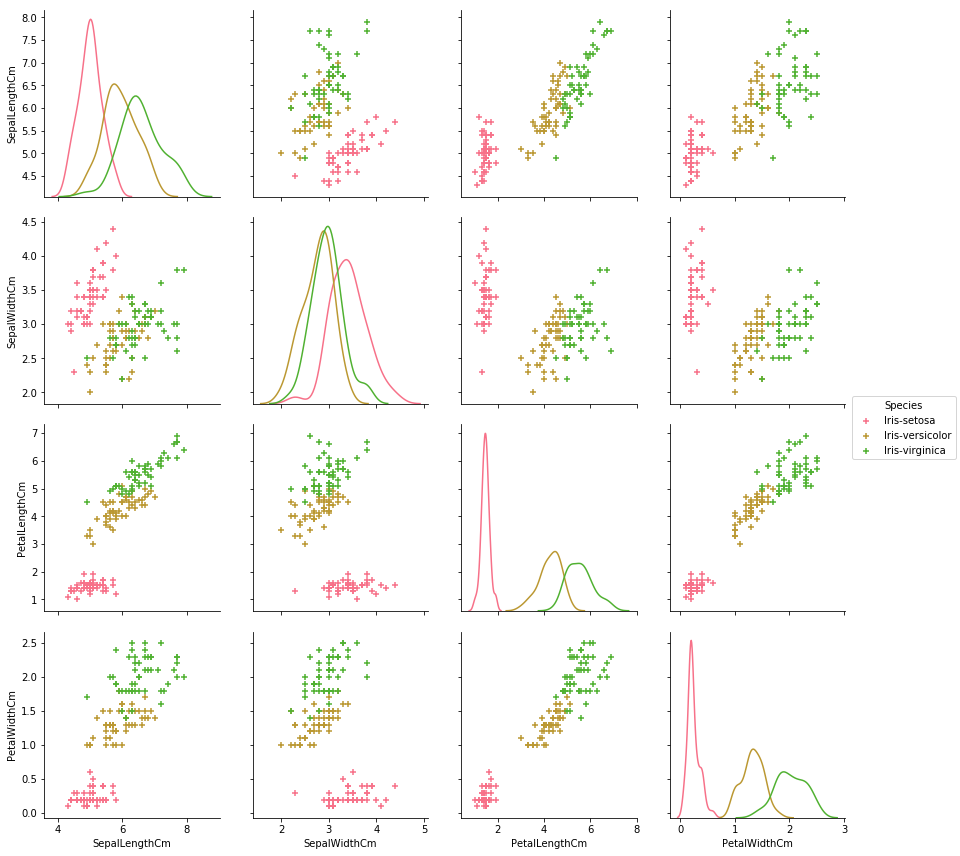

In [23]:
# Using seaborn pairplot to see the bivariate relation between each pair of features

import seaborn as sns
sns.set_palette('husl')

nl = data_iris.drop('Id', axis=1) #dropping the Id 
b = sns.pairplot(nl,hue="Species",diag_kind="kde", markers='+',size =3 );
plt.show()

**Take away points from the above visualization:**

- In the above plot, the diagonal grouping of some pairs of attributes. This suggests a high correlation and a predictable relationship
- The relationship between pairs of features of an Iris-Setosa (in pink) is distinctly different from those of the other two species.
- There is an overlap in the pairwise relationships of the other two species, Iris-Versicolor (brown) and Iris-Virginia (green) 

In [14]:
#Data setup
import numpy as np
Species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
#Number of examples
m = data_iris.shape[0]
#Features
n = 4
#Number of classes
k = 3

X = np.ones((m,n + 1))
y = np.array((m,1))
X[:,1] = data_iris['PetalLengthCm'].values
X[:,2] = data_iris['PetalWidthCm'].values
X[:,3] = data_iris['SepalLengthCm'].values
X[:,4] = data_iris['SepalWidthCm'].values

#Labels
y = data_iris['Species'].values

#Mean normalization
for j in range(n):
    X[:, j] = (X[:, j] - X[:,j].mean())


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)# it shows 80% of data is split for tran

X = data_iris.drop(['Id', 'Species'], axis=1)
y = data_iris['Species']
# print(X.head())
print(X_train.shape)
# print(y.head())
print(y_test.shape)

(120, 5)
(30,)


# Logistic Regression from Scratch 

## Picking up Link Function 

We can transform a Logistic model to a predictor by using **link function**. We will be using [sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) function for our model. Below is the image that shows the S-curve and the equation of the sigmoid function. 
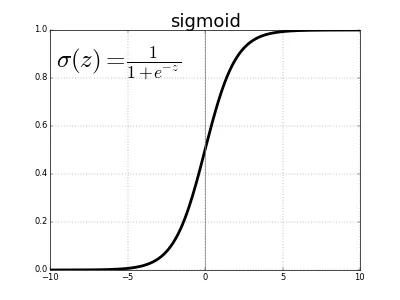

Let us see how can we put the equation in the form of code.

Detailed explanation on the sigmoid, cost function and gradient descent is given in [Andrew Ng lectures](coursera.org/lecture/machine-learning/classification-wlPeP) series.

## Regularization
The regularization addresses the occurrence of error while training the model with data, overfitting, and underfitting of the model. Starting with **over-fitting** it is the problem of high-variance and too complicated model with lots of unnecessary curves and angles to the model. Your model is best fitted for the training data but it performs poorly when it comes to testing data. Second is **under-fitting** it is a case of low variance and too simple model. When we apply regularization, all the features are kept and the model adjusts θj. So we will add it at the end of cost function and gradient descent function.



### Regularized Cost Function
![#Regularized Cost](http://i.imgur.com/id7nVp6.png)


### Regularized Gradient
![#Regularized Gradient](http://i.imgur.com/7x8omie.png)


There are multiple ways to write equations into code format. Choose the one you are comfortable with easily express the expression in the right way.

# Putting it all Together 

In [16]:
#Sigmoid function
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

#Regularized cost function
def reglrCostFunction(theta, X, y, _lambda = 0.1):
    m = len(y)
    h = sigmoid(X.dot(theta))
    J = (1 / m) * (-y.T.dot(np.log(h)) - (1 - y).T.dot(np.log(1 - h)))
    reg = (_lambda/(2 * m)) * np.sum(theta**2)
    J = J + reg
 
    return J

#Regularized gradient function
def reglrGradient(theta, X, y, _lambda = 0.1):
    m, n = X.shape
    theta = theta.reshape((n, 1))
    y = y.reshape((m, 1))
    h = sigmoid(X.dot(theta))
    reg = _lambda * theta /m
    gd = ((1 / m) * X.T.dot(h - y)) 
    gd = gd + reg

    return gd

#Optimizing logistic regression (theta)
def logisticRegression(X, y, theta):
    result = op.minimize(fun = reglrCostFunction, x0 = theta, args = (X, y),
                         method = 'TNC', jac = reglrGradient)
    
    return result.x

In [17]:
#Training

all_theta = np.zeros((k, n + 1))

#One vs all
i = 0
for flower in Species:
    #set the labels in 0 and 1
    tmp_y = np.array(y_train == flower, dtype = int)
    optTheta = logisticRegression(X_train, tmp_y, np.zeros((n + 1,1)))
    all_theta[i] = optTheta
    i += 1
    

In [18]:

#Predictions
P = sigmoid(X_test.dot(all_theta.T)) #probability for each flower
p = [Species[np.argmax(P[i, :])] for i in range(X_test.shape[0])]

print("Test Accuracy ", accuracy_score(y_test, p) * 100 , '%')

Test Accuracy  96.66666666666667 %


The model is acceptable as the accuracy is nearing 97%. Let us see the heat map find out the correlation between features in the dataset. High positive or negative value shows that the features have a high correlation.


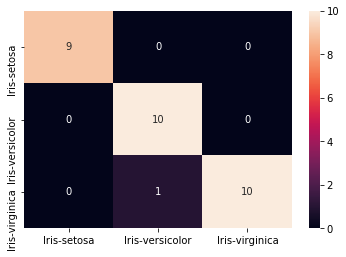

In [19]:
#Confusion Matrix
cfm = confusion_matrix(y_test, p, labels = Species)

sb.heatmap(cfm, annot = True, xticklabels = Species, yticklabels = Species);

# Logistic Regression with Scikit-Learn 

Our maths looks fine it's pretty clear that our functions work and output is perfect. However, It is nothing wrong to know ground truth.Lets check if we get the same results with Scikit Learn model.

Fortunately, I can compare my functions performance with an accuracy of the sk-learn’s logistic regression function, which is known to be a correct implementation. Also, scikit-learns' `LogisticRegression` does regularization automatically.  

## Steps To Be followed When Applying an Algorithm

Mentioned steps are generalized can be used to build any classification or regression model: 

1. After splitting data into training and testing(done already in our case), select an algorithm based on the problem - We selected Logistic Regression.
2. To fit the model we pass the training dataset to the algorithm to train it. We use the **.fit()** method
3. To predict the outcome the testing data to the trained algorithm is passed. We use the **.predict()** method.
4. We then check the **accuracy** (our evaluation matrix) by passing the predicted outcome and the actual output to the model.

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Test Accuracy for Scikit-Learn model:', metrics.accuracy_score(y_test, y_pred)* 100,'%')


Test Accuracy for Scikit-Learn model: 96.66666666666667 %


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



The classification report shows that the model gives nearly 97% accuracy on 30 test samples. Our model is pretty well received.

# Conclusion

The accuracy of the logistic model using functions and by using scikit-learn is a match! (which makes sense). Although we have an accuracy nearing 97% there is a still room for improvement. It is always preferred to use **sklearn Logistic Regression** model in production.As it will take less processing time (compare lines of code) and package uses a highly optimized solver. So, when will the building algorithms from scratch come handy? Its when you come across a situation where you have to design a model to fit more complex problems or give shape to the model of the new domain.

For a start, we have selected a simple dataset with fewer features. Just keep in mind that the performance and selection of the model or a technique totally depend on the volume and variety if the data. Final tip! don't worry if the algorithm is not as optimized and fancy like the exciting packages. Those packages are the result of a strong base and consistency improvement in development.